In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,MultiLabelBinarizer
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import KNNImputer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from numpy import log1p
from xgboost import XGBClassifier

In [84]:
data = pd.read_csv("train.csv")
data

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert
...,...,...,...,...,...,...,...,...,...
18519,18519,3.0,No,7.0,3.0,No,9.0,7.0,Extrovert
18520,18520,1.0,NaN,6.0,7.0,No,6.0,5.0,Extrovert
18521,18521,7.0,Yes,1.0,1.0,Yes,1.0,NaN,Introvert
18522,18522,NaN,Yes,1.0,0.0,Yes,5.0,2.0,Introvert


In [62]:
data = data.drop(columns="id")
data

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert
...,...,...,...,...,...,...,...,...
18519,3.0,No,7.0,3.0,No,9.0,7.0,Extrovert
18520,1.0,NaN,6.0,7.0,No,6.0,5.0,Extrovert
18521,7.0,Yes,1.0,1.0,Yes,1.0,NaN,Introvert
18522,NaN,Yes,1.0,0.0,Yes,5.0,2.0,Introvert


In [85]:
data['Drained_after_socializing'] = data['Drained_after_socializing'].map({
    'Yes': 1,
    'No': 0
})
data

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,0.0,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,0.0,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,0.0,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,0.0,13.0,NaN,Extrovert
...,...,...,...,...,...,...,...,...,...
18519,18519,3.0,No,7.0,3.0,0.0,9.0,7.0,Extrovert
18520,18520,1.0,NaN,6.0,7.0,0.0,6.0,5.0,Extrovert
18521,18521,7.0,Yes,1.0,1.0,1.0,1.0,NaN,Introvert
18522,18522,NaN,Yes,1.0,0.0,1.0,5.0,2.0,Introvert


In [86]:
data['Stage_fear'] = data['Stage_fear'].map({
    'Yes': 1,
    'No': 0
})
data

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,0.0,6.0,4.0,0.0,15.0,5.0,Extrovert
1,1,1.0,0.0,7.0,3.0,0.0,10.0,8.0,Extrovert
2,2,6.0,1.0,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,0.0,7.0,3.0,0.0,11.0,5.0,Extrovert
4,4,1.0,0.0,4.0,4.0,0.0,13.0,NaN,Extrovert
...,...,...,...,...,...,...,...,...,...
18519,18519,3.0,0.0,7.0,3.0,0.0,9.0,7.0,Extrovert
18520,18520,1.0,NaN,6.0,7.0,0.0,6.0,5.0,Extrovert
18521,18521,7.0,1.0,1.0,1.0,1.0,1.0,NaN,Introvert
18522,18522,NaN,1.0,1.0,0.0,1.0,5.0,2.0,Introvert


In [87]:
# Step 1: Separate numeric and non-numeric columns
numeric_cols = data.select_dtypes(include='number').columns
non_numeric_cols = data.select_dtypes(exclude='number').columns

# Step 2: Apply KNN Imputer on numeric data only
imputer = KNNImputer(n_neighbors=5)
numeric_data = pd.DataFrame(imputer.fit_transform(data[numeric_cols]), columns=numeric_cols)

# Step 3: Combine numeric and non-numeric data
data_imputed = pd.concat([numeric_data, data[non_numeric_cols].reset_index(drop=True)], axis=1)

In [88]:
data_imputed

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0.0,0.0,0.0,6.0,4.0,0.0,15.0,5.0,Extrovert
1,1.0,1.0,0.0,7.0,3.0,0.0,10.0,8.0,Extrovert
2,2.0,6.0,1.0,1.0,0.0,0.0,3.0,0.0,Introvert
3,3.0,3.0,0.0,7.0,3.0,0.0,11.0,5.0,Extrovert
4,4.0,1.0,0.0,4.0,4.0,0.0,13.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...,...
18519,18519.0,3.0,0.0,7.0,3.0,0.0,9.0,7.0,Extrovert
18520,18520.0,1.0,0.0,6.0,7.0,0.0,6.0,5.0,Extrovert
18521,18521.0,7.0,1.0,1.0,1.0,1.0,1.0,6.0,Introvert
18522,18522.0,3.0,1.0,1.0,0.0,1.0,5.0,2.0,Introvert


In [ ]:
for col in data_imputed.columns:
    data_imputed[col].hist(bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

In [67]:
data_imputed

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0.0,0.0,6.0,4.0,0.0,15.0,5.0,Extrovert
1,1.0,0.0,7.0,3.0,0.0,10.0,8.0,Extrovert
2,6.0,1.0,1.0,0.0,1.0,3.0,0.0,Introvert
3,3.0,0.0,7.0,3.0,0.0,11.0,5.0,Extrovert
4,1.0,0.0,4.0,4.0,0.0,13.0,6.0,Extrovert
...,...,...,...,...,...,...,...,...
18519,3.0,0.0,7.0,3.0,0.0,9.0,7.0,Extrovert
18520,1.0,0.0,6.0,7.0,0.0,6.0,5.0,Extrovert
18521,7.0,1.0,1.0,1.0,1.0,1.0,0.8,Introvert
18522,7.0,1.0,1.0,0.0,1.0,5.0,2.0,Introvert


In [90]:
data_imputed["Personality"] = data_imputed["Personality"].map({
    "Extrovert":1 ,
    "Introvert" :0 })  

In [91]:
skewed = data_imputed.skew().sort_values(ascending=False)
print(skewed[skewed.abs() > 1]) 

Stage_fear                   1.175061
Drained_after_socializing    1.166834
Time_spent_Alone             1.161071
Personality                 -1.091595
dtype: float64


In [93]:
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

X = data_imputed.drop(columns=["Personality"])
pt = PowerTransformer(method='yeo-johnson')
X_transformed = pt.fit_transform(X)

# OR Quantile Transform (robust but less interpretable)
qt = QuantileTransformer(output_distribution='normal')  # or 'uniform'
X_transformed = qt.fit_transform(X)
X_transformed

array([[-5.19933758, -5.19933758, -5.19933758, ..., -5.19933758,
         5.19933758, -0.01631012],
       [-3.93481593, -0.65182431, -5.19933758, ..., -5.19933758,
         0.35081689,  0.90708024],
       [-3.76504219,  0.94561627,  5.19933758, ..., -5.19933758,
        -1.11871144, -5.19933758],
       ...,
       [ 3.83641388,  1.09327227,  5.19933758, ...,  5.19933758,
        -1.70557043,  0.26138737],
       [ 5.19933758,  0.32161055,  5.19933758, ...,  5.19933758,
        -0.59693534, -0.94365623],
       [ 5.19933758, -0.65182431, -5.19933758, ..., -5.19933758,
        -0.86984634,  0.56721139]], shape=(18524, 8))

In [94]:
for col in data_imputed.columns:
    if data_imputed[col].min() >= 0 and data_imputed[col].skew() > 1 and col != "Personality":
        data_imputed[f"{col}_log"] = log1p(data_imputed[col]) 
data_imputed

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,Time_spent_Alone_log,Stage_fear_log,Drained_after_socializing_log
0,0.0,0.0,0.0,6.0,4.0,0.0,15.0,5.0,1,0.000000,0.000000,0.000000
1,1.0,1.0,0.0,7.0,3.0,0.0,10.0,8.0,1,0.693147,0.000000,0.000000
2,2.0,6.0,1.0,1.0,0.0,0.0,3.0,0.0,0,1.945910,0.693147,0.000000
3,3.0,3.0,0.0,7.0,3.0,0.0,11.0,5.0,1,1.386294,0.000000,0.000000
4,4.0,1.0,0.0,4.0,4.0,0.0,13.0,5.0,1,0.693147,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
18519,18519.0,3.0,0.0,7.0,3.0,0.0,9.0,7.0,1,1.386294,0.000000,0.000000
18520,18520.0,1.0,0.0,6.0,7.0,0.0,6.0,5.0,1,0.693147,0.000000,0.000000
18521,18521.0,7.0,1.0,1.0,1.0,1.0,1.0,6.0,0,2.079442,0.693147,0.693147
18522,18522.0,3.0,1.0,1.0,0.0,1.0,5.0,2.0,0,1.386294,0.693147,0.693147


In [95]:
y = data_imputed['Personality']
count_0 = sum(y == 0)  # extroverts
count_1 = sum(y == 1)  # introverts
scale_pos_weight = count_0 / count_1
print(f"scale_pos_weight = {scale_pos_weight:.2f}")

scale_pos_weight = 0.35


In [96]:
train=data_imputed.drop('Personality',axis=1)
test=data_imputed['Personality']
x_train,x_test,y_train,y_test=train_test_split(train,test,random_state=66,test_size=.2)

In [99]:
from sklearn.compose import ColumnTransformer

numeric_cols = data_imputed.select_dtypes(include='number').columns
preprocessor = ColumnTransformer([
    ('power', PowerTransformer(method='yeo-johnson'), numeric_cols)
])
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss' , scale_pos_weight=scale_pos_weight))
])

In [100]:

param_dist = {
    'xgb__n_estimators': [100, 200, 300],
    'xgb__max_depth': [3, 4, 5, 6, 7],
    'xgb__learning_rate': np.linspace(0.01, 0.3, 10),
    'xgb__subsample': [0.6, 0.8, 1.0],
    'xgb__colsample_bytree': [0.6, 0.8, 1.0],
    'xgb__gamma': [0, 0.1, 0.2, 0.3],
    'xgb__reg_alpha': [0, 0.1, 0.5],
    'xgb__reg_lambda': [1, 1.5, 2]
}

search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=50,
    scoring='accuracy',  # or 'f1', 'roc_auc', etc.
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

search.fit(x_train, y_train)
print("Best Score:", search.best_score_)
print("Best Parameters:", search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Score: 0.9691612205049867
Best Parameters: {'xgb__subsample': 1.0, 'xgb__reg_lambda': 1, 'xgb__reg_alpha': 0, 'xgb__n_estimators': 100, 'xgb__max_depth': 6, 'xgb__learning_rate': np.float64(0.042222222222222223), 'xgb__gamma': 0, 'xgb__colsample_bytree': 0.8}


d:\python-projects\kaggle-datasets\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:50:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [101]:
xgb_best = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.042,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.1,
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=scale_pos_weight, 
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_best.fit(x_train, y_train)
y_pred = xgb_best.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9657219973009447
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       969
           1       0.98      0.98      0.98      2736

    accuracy                           0.97      3705
   macro avg       0.96      0.96      0.96      3705
weighted avg       0.97      0.97      0.97      3705



d:\python-projects\kaggle-datasets\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:52:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [12]:
model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

model.fit(x_train, y_train)
model.score(x_test, y_test)

d:\python-projects\kaggle-datasets\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:19:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


0.9668016194331984

<Axes: >

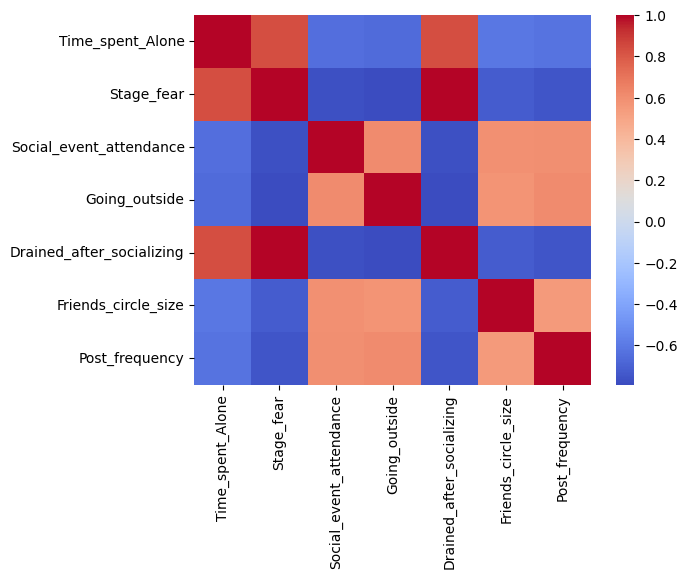

In [11]:
sns.heatmap(pd.DataFrame(x_train).corr(), annot=False, cmap='coolwarm')

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier


ensemble = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression()),
        ('rf', RandomForestClassifier())
    ],
    voting='soft' 
)

ensemble.fit(x_train, y_train)
y_pred = ensemble.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9670715249662618


In [10]:

from sklearn.ensemble import RandomForestClassifier


params = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8, None],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt', 'log2']
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=params,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

grid.fit(x_train, y_train)
print("Best params:", grid.best_params_)

Best params: {'max_depth': 4, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 100}


In [11]:
model = RandomForestClassifier()
model.set_params(**grid.best_params_)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9668016194331984


In [54]:
param_grid = {
    'hidden_layer_sizes': [(64, 32), (128, 64), (64, 64, 32)],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01]
}

grid = GridSearchCV(MLPClassifier(max_iter=500), param_grid, scoring='neg_mean_squared_error', cv=5)
grid.fit(x_train, y_train)

print("Best parameters:", grid.best_params_)

Best parameters: {'alpha': 0.01, 'hidden_layer_sizes': (128, 64), 'learning_rate_init': 0.001}


In [76]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.preprocessing import MinMaxScaler


pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model',  MLPClassifier(alpha=0.01,hidden_layer_sizes=(128, 64),learning_rate_init=0.001))
])

pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


0.9673414304993252


In [102]:
test_data = pd.read_csv('test.csv')
test_data

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,No,7.0,4.0,No,6.0,NaN
1,18525,NaN,Yes,0.0,0.0,Yes,5.0,1.0
2,18526,3.0,No,5.0,6.0,No,15.0,9.0
3,18527,3.0,No,4.0,4.0,No,5.0,6.0
4,18528,9.0,Yes,1.0,2.0,Yes,1.0,1.0
...,...,...,...,...,...,...,...,...
6170,24694,3.0,No,5.0,5.0,No,9.0,6.0
6171,24695,8.0,Yes,2.0,1.0,Yes,0.0,0.0
6172,24696,2.0,No,4.0,3.0,No,9.0,7.0
6173,24697,3.0,No,4.0,4.0,No,11.0,9.0


In [103]:
test_data['Drained_after_socializing'] = test_data['Drained_after_socializing'].map({
    'Yes': 1,
    'No': 0
})
test_data

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,No,7.0,4.0,0.0,6.0,NaN
1,18525,NaN,Yes,0.0,0.0,1.0,5.0,1.0
2,18526,3.0,No,5.0,6.0,0.0,15.0,9.0
3,18527,3.0,No,4.0,4.0,0.0,5.0,6.0
4,18528,9.0,Yes,1.0,2.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
6170,24694,3.0,No,5.0,5.0,0.0,9.0,6.0
6171,24695,8.0,Yes,2.0,1.0,1.0,0.0,0.0
6172,24696,2.0,No,4.0,3.0,0.0,9.0,7.0
6173,24697,3.0,No,4.0,4.0,0.0,11.0,9.0


In [104]:
test_data['Stage_fear'] = test_data['Stage_fear'].map({
    'Yes': 1,
    'No': 0
})
test_data

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,0.0,7.0,4.0,0.0,6.0,NaN
1,18525,NaN,1.0,0.0,0.0,1.0,5.0,1.0
2,18526,3.0,0.0,5.0,6.0,0.0,15.0,9.0
3,18527,3.0,0.0,4.0,4.0,0.0,5.0,6.0
4,18528,9.0,1.0,1.0,2.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
6170,24694,3.0,0.0,5.0,5.0,0.0,9.0,6.0
6171,24695,8.0,1.0,2.0,1.0,1.0,0.0,0.0
6172,24696,2.0,0.0,4.0,3.0,0.0,9.0,7.0
6173,24697,3.0,0.0,4.0,4.0,0.0,11.0,9.0


In [105]:
numeric_cols = test_data.select_dtypes(include='number').columns
non_numeric_cols = test_data.select_dtypes(exclude='number').columns

# Step 2: Apply KNN Imputer on numeric data only
imputer = KNNImputer(n_neighbors=5)
numeric_data = pd.DataFrame(imputer.fit_transform(test_data[numeric_cols]), columns=numeric_cols)

# Step 3: Combine numeric and non-numeric data
data_imputed_test = pd.concat([numeric_data, test_data[non_numeric_cols].reset_index(drop=True)], axis=1)
data_imputed_test

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524.0,3.0,0.0,7.0,4.0,0.0,6.0,5.2
1,18525.0,5.6,1.0,0.0,0.0,1.0,5.0,1.0
2,18526.0,3.0,0.0,5.0,6.0,0.0,15.0,9.0
3,18527.0,3.0,0.0,4.0,4.0,0.0,5.0,6.0
4,18528.0,9.0,1.0,1.0,2.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
6170,24694.0,3.0,0.0,5.0,5.0,0.0,9.0,6.0
6171,24695.0,8.0,1.0,2.0,1.0,1.0,0.0,0.0
6172,24696.0,2.0,0.0,4.0,3.0,0.0,9.0,7.0
6173,24697.0,3.0,0.0,4.0,4.0,0.0,11.0,9.0


In [106]:
for col in data_imputed_test.columns:
    if data_imputed_test[col].min() >= 0 and data_imputed_test[col].skew() > 1 and col != "Personality":
        data_imputed_test[f"{col}_log"] = log1p(data_imputed_test[col]) 
data_imputed_test

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Time_spent_Alone_log,Stage_fear_log,Drained_after_socializing_log
0,18524.0,3.0,0.0,7.0,4.0,0.0,6.0,5.2,1.386294,0.000000,0.000000
1,18525.0,5.6,1.0,0.0,0.0,1.0,5.0,1.0,1.887070,0.693147,0.693147
2,18526.0,3.0,0.0,5.0,6.0,0.0,15.0,9.0,1.386294,0.000000,0.000000
3,18527.0,3.0,0.0,4.0,4.0,0.0,5.0,6.0,1.386294,0.000000,0.000000
4,18528.0,9.0,1.0,1.0,2.0,1.0,1.0,1.0,2.302585,0.693147,0.693147
...,...,...,...,...,...,...,...,...,...,...,...
6170,24694.0,3.0,0.0,5.0,5.0,0.0,9.0,6.0,1.386294,0.000000,0.000000
6171,24695.0,8.0,1.0,2.0,1.0,1.0,0.0,0.0,2.197225,0.693147,0.693147
6172,24696.0,2.0,0.0,4.0,3.0,0.0,9.0,7.0,1.098612,0.000000,0.000000
6173,24697.0,3.0,0.0,4.0,4.0,0.0,11.0,9.0,1.386294,0.000000,0.000000


In [107]:
feature_columns = [col for col in data_imputed_test.columns if col not in ["id"]]
X_test = data_imputed_test[feature_columns]
y_test_pred = xgb_best.predict(X_test) 
submission = pd.DataFrame({
    "id": data_imputed_test["id"].astype(int),
    "Personality": y_test_pred
})
submission

ValueError: feature_names mismatch: ['id', 'Time_spent_Alone', 'Stage_fear', 'Social_event_attendance', 'Going_outside', 'Drained_after_socializing', 'Friends_circle_size', 'Post_frequency', 'Time_spent_Alone_log', 'Stage_fear_log', 'Drained_after_socializing_log'] ['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance', 'Going_outside', 'Drained_after_socializing', 'Friends_circle_size', 'Post_frequency', 'Time_spent_Alone_log', 'Stage_fear_log', 'Drained_after_socializing_log']
expected id in input data

In [81]:
submission["Personality"] = submission["Personality"].map({1:"Extrovert", 0:"Introvert"})

In [82]:
submission

,id,Personality
0,18524,Extrovert
1,18525,Introvert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Introvert
...,...,...
6170,24694,Extrovert
6171,24695,Introvert
6172,24696,Extrovert
6173,24697,Extrovert


In [83]:
submission.to_csv("submission7.csv", index=False)